In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv('cardio_train.csv',sep=';')
df = df.drop(columns=['id'])
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
df.shape


(70000, 12)

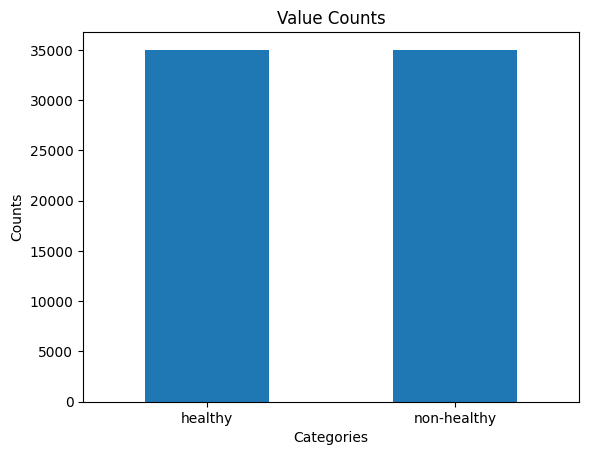

In [19]:
df.describe()
class_counts = df.groupby('cardio').size()
class_counts.rename({0: 'healthy', 1: 'non-healthy'}).plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [5]:
X = df.drop(columns=['cardio'])  # Features
y = df['cardio']  # Target variable

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train.value_counts()

cardio
0    24560
1    24440
Name: count, dtype: int64

In [6]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



classifiers = {
    "LinearSVC": LinearSVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3),
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    "KNN": KNeighborsClassifier()
}

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy=[]
precision=[]
recall=[]


for name, model in classifiers.items():

    model.fit(X_train_scaled, y_train)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)


    print(f"\n{name} Metrics:")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    print("Confusion Matrix for Decision Tree:")
    print(confusion_matrix(y_test, test_predictions))

    print("Classification Report:")
    print(classification_report(y_test, test_predictions))

    precision_value = precision_score(y_test, test_predictions)

# Calculate recall
    recall_value = recall_score(y_test, test_predictions)

    accuracy.append([name,test_accuracy])
    precision.append([name,precision_value])
    recall.append([name,recall_value])

    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1 Score:", f1)

# def average_metric(metric_name):
#     return np.mean([cross_val_score(model, X_train, y_train, cv=5, scoring=metric_name).mean() for model in classifiers.values()])


# print("\nAverage Metrics Across Classifiers:")
# print("Average Accuracy:", average_metric('accuracy'))
# print("Average Precision:", average_metric('precision_weighted'))
# print("Average Recall:", average_metric('recall_weighted'))
# print("Average F1 Score:", average_metric('f1_weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC Metrics:
Train Accuracy: 0.6695102040816326
Test Accuracy: 0.6761428571428572
Confusion Matrix for Decision Tree:
[[7471 2990]
 [3811 6728]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.69     10461
           1       0.69      0.64      0.66     10539

    accuracy                           0.68     21000
   macro avg       0.68      0.68      0.68     21000
weighted avg       0.68      0.68      0.68     21000


DecisionTree Metrics:
Train Accuracy: 0.732326530612245
Test Accuracy: 0.7341904761904762
Confusion Matrix for Decision Tree:
[[8362 2099]
 [3483 7056]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10461
           1       0.77      0.67      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     2

In [7]:
from sklearn.calibration import CalibratedClassifierCV
base_classifiers = [
    ("LinearSVC", CalibratedClassifierCV(LinearSVC(random_state=42))),
    ("DecisionTree", DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3)),
    ("RandomForest", RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)),
    ('knn', KNeighborsClassifier())
]

# Define the stacking classifier with Logistic Regression as the meta-classifier
stack_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(random_state=42),
    stack_method='predict_proba',
    cv=5  # Cross-validation strategy for training base classifiers
)

# Train the stacking classifier
stack_clf.fit(X_train_scaled, y_train)

# Predict and evaluate the stacking classifier
final_predictions = stack_clf.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train,stack_clf.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, final_predictions)
print("Training Accuracy of stacking classifier:", train_accuracy)
print("Test Accuracy of stacking classifier:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Training Accuracy of stacking classifier: 0.7546734693877551
Test Accuracy of stacking classifier: 0.7392380952380952


In [8]:
print("Classification Report:")
print(classification_report(y_test, final_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10461
           1       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



In [9]:
precision_value = precision_score(y_test, final_predictions)

# Calculate recall
recall_value = recall_score(y_test, final_predictions)

accuracy.append(["Stacked",test_accuracy])
precision.append(["Stacked",precision_value])
recall.append(["Stacked",recall_value])

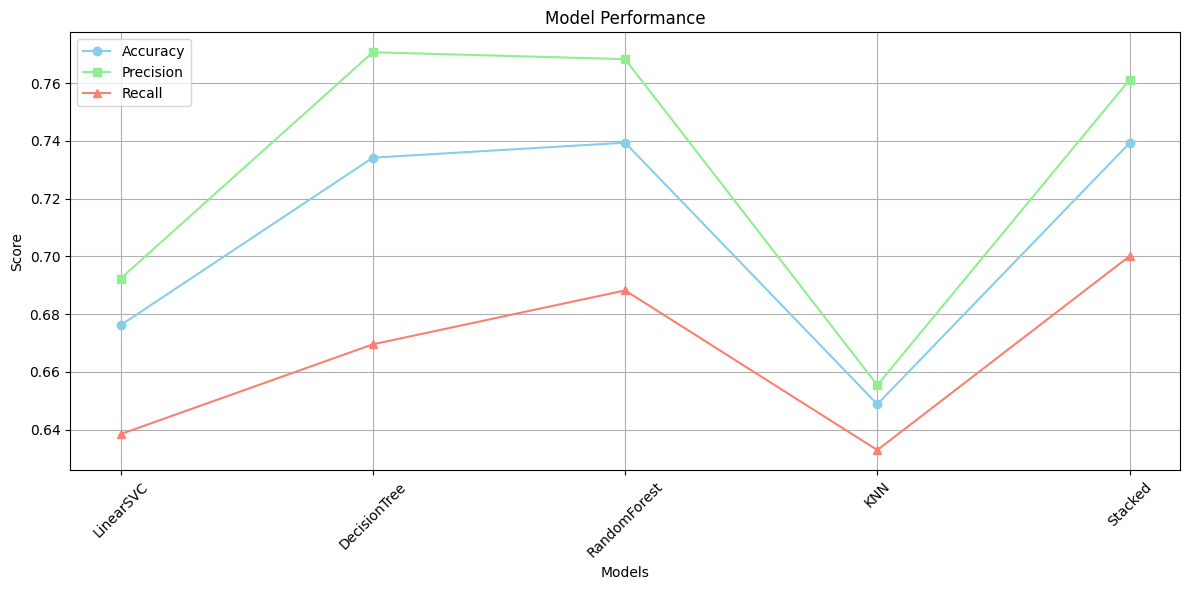

In [10]:
accuracy_scores = [entry[1] for entry in accuracy]  # Extracting model names and removing them from sets
model_names = [entry[0] for entry in accuracy]  # Extracting scores and removing them from sets

precision_scores = [entry[1] for entry in precision]  # Extracting scores and removing them from sets

recall_scores = [entry[1] for entry in recall]  # Extracting scores and removing them from sets

accuracy_scores


plt.figure(figsize=(12, 6))

plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', label='Accuracy')
plt.plot(model_names, precision_scores, marker='s', color='lightgreen', label='Precision')
plt.plot(model_names, recall_scores, marker='^', color='salmon', label='Recall')

plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

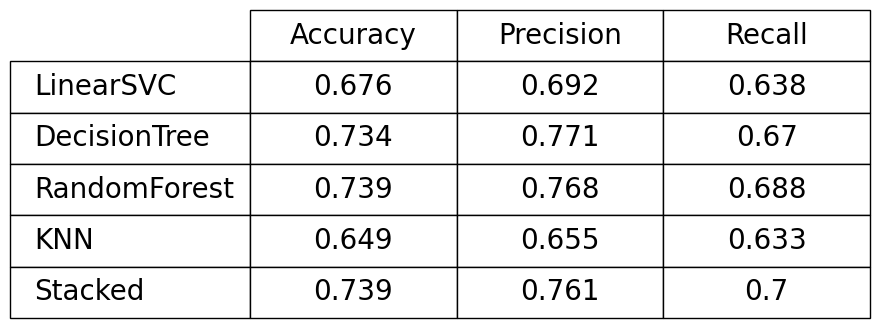

In [11]:
accuracy_scores = [round(score, 3) for score in accuracy_scores]
precision_scores = [round(score, 3) for score in precision_scores]
recall_scores = [round(score, 3) for score in recall_scores]
data = {
    'Model Name': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df = pd.DataFrame(data)
df.set_index('Model Name', inplace=True)

# Create table plot
plt.figure(figsize=(8, 4))
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center',bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(1.2, 1.2)

# Hide axis
plt.axis('off')

# Save table as image
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.05)
